In [1]:
import numpy as np
import pandas as pd 
from sklearn import datasets

Libraries

In [4]:
!pip install torch
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

Load Dataset

In [16]:
df1 = pd.read_csv('iris.data.csv');

In [17]:
df1.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [21]:
df1['Iris-setosa'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

LabelEncoding

In [22]:
df1['Species'] = df1['Iris-setosa'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [26]:
df1.head()

,5.1,3.5,1.4,0.2,Iris-setosa,Species
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


In [28]:
df1.drop('Iris-setosa', axis=1, inplace=True)

In [29]:
X = df1.drop(["Species"],axis=1).values
y = df1["Species"].values

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
scaler = StandardScaler()

Train & Test & Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Converting from Numpy Array to Torch Tensor

In [34]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Create model

In [35]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [36]:
# input_dim = 4 because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
# output_dim = 3 because we have namely 3 categories setosa,versicolor and virginica
input_dim  = 4 
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim,output_dim)

In [37]:
# creating our optimizer and loss function object
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [38]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [39]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [40]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.0017, Test Loss: 0.5044
Epoch 100/1000, Train Loss: 0.0004, Test Loss: 0.6257
Epoch 150/1000, Train Loss: 0.0002, Test Loss: 0.6912
Epoch 200/1000, Train Loss: 0.0001, Test Loss: 0.7348
Epoch 250/1000, Train Loss: 0.0001, Test Loss: 0.7641
Epoch 300/1000, Train Loss: 0.0000, Test Loss: 0.7860
Epoch 350/1000, Train Loss: 0.0000, Test Loss: 0.8039
Epoch 400/1000, Train Loss: 0.0000, Test Loss: 0.8192
Epoch 450/1000, Train Loss: 0.0000, Test Loss: 0.8326
Epoch 500/1000, Train Loss: 0.0000, Test Loss: 0.8441
Epoch 550/1000, Train Loss: 0.0000, Test Loss: 0.8546
Epoch 600/1000, Train Loss: 0.0000, Test Loss: 0.8644
Epoch 650/1000, Train Loss: 0.0000, Test Loss: 0.8734
Epoch 700/1000, Train Loss: 0.0000, Test Loss: 0.8816
Epoch 750/1000, Train Loss: 0.0000, Test Loss: 0.8887
Epoch 800/1000, Train Loss: 0.0000, Test Loss: 0.8948
Epoch 850/1000, Train Loss: 0.0000, Test Loss: 0.9005
Epoch 900/1000, Train Loss: 0.0000, Test Loss: 0.9059
Epoch 950/1000, Train Loss: 0

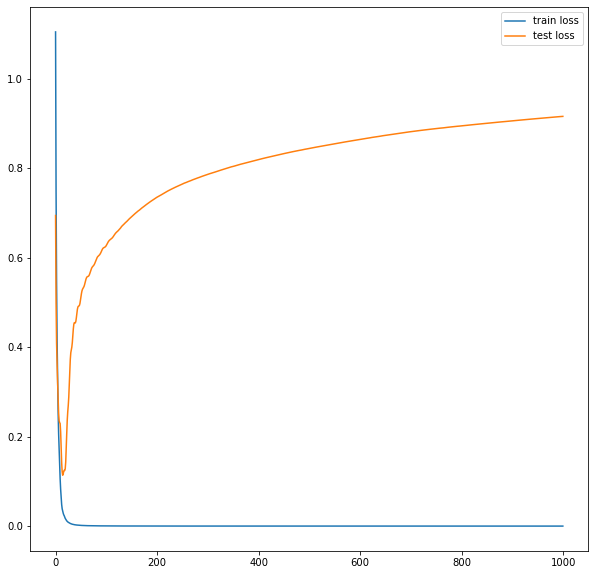

In [41]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [42]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [47]:
predictions_train 

tensor([[ -3.0985,  18.6877, -13.7425],
        [-13.0459,  -0.5528,   8.3272],
        [-21.3631, -22.6028,  32.1385],
        [ -8.9813,  15.7826,  -6.8143],
        [-21.6974, -24.0740,  33.6451],
        [ -3.0327,  14.6672, -10.1815],
        [-25.1024, -21.1438,  33.7477],
        [ -2.2314,  18.9963, -15.1932],
        [ 28.8353,  13.7410, -48.6017],
        [-17.1347, -13.3718,  21.4458],
        [-13.6656,  14.4305,  -2.9095],
        [ 30.6675,  10.3787, -47.8281],
        [ 24.4077,  12.5936, -44.0377],
        [ 28.6715,  12.2602, -47.0565],
        [ -4.2762,  12.8887,  -7.6027],
        [-15.7926,  -4.4610,  13.0892],
        [ 27.2071,  14.3639, -47.1887],
        [ 29.3933,  11.4940, -46.7041],
        [ 30.2426,   9.9966, -46.7969],
        [ -5.4054,  13.3868,  -7.4973],
        [ 32.6280,  12.0514, -51.0462],
        [ -0.5839,  14.3932, -12.7829],
        [-18.2752, -14.4005,  23.5459],
        [ 32.2502,  13.8151, -52.1719],
        [ -4.2683,  17.4139, -11.3984],


In [48]:
y_train

tensor([1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0,
        1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2,
        2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
        1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 1,
        2, 2, 0, 1, 2, 0, 1, 2])

In [49]:
y_test

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])

In [44]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [45]:
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [46]:
print(f"Test Accuracy: {round(test_acc*100,3)}")

Test Accuracy: 93.333
